Shape of the dataset: (1106, 38)
Columns in the dataset: Index(['Name', 'Date', 'Micro-cycle', 'Position', 'Attendance', 'MatchDay',
       'Sleep', 'Stress', 'Fatigue', 'Pain', 'Wellness', 'RPE', 'Duration',
       'TL', 'Acute', 'Chronic', 'ACWR', 'Total Duration', 'TD/min',
       'Dist MP 20-35W', 'Dist MP 35-55W', 'Dist MP>55 W',
       'Distance 14,4-19,8 km/h / min', 'Distance 19,8-25 km/h / min',
       'Distance > 25 km/h / min', 'Dist Acc>3 / min', 'Dist Dec <-3 / min',
       'Line Up', 'Profile', 'week', 'CMJ_Flag', 'CMJ_Flag_check', 'DayOfWeek',
       'Dist Acc 2-3 / min', 'Dist Dec 2-3 / min', 'Dist MP 20-35W / min',
       'Dist MP 35-55W / min', 'Dist MP>55 W / min'],
      dtype='object')
First few rows of the dataset:
       Name       Date  Micro-cycle Position Attendance MatchDay  Sleep  \
0  PLAYER 1 2023-08-10            3      OMF   PRESENTE     MD-4      3   
1  PLAYER 1 2023-08-11            3      OMF        OFF      OFF      3   
2  PLAYER 1 2023-08-12      

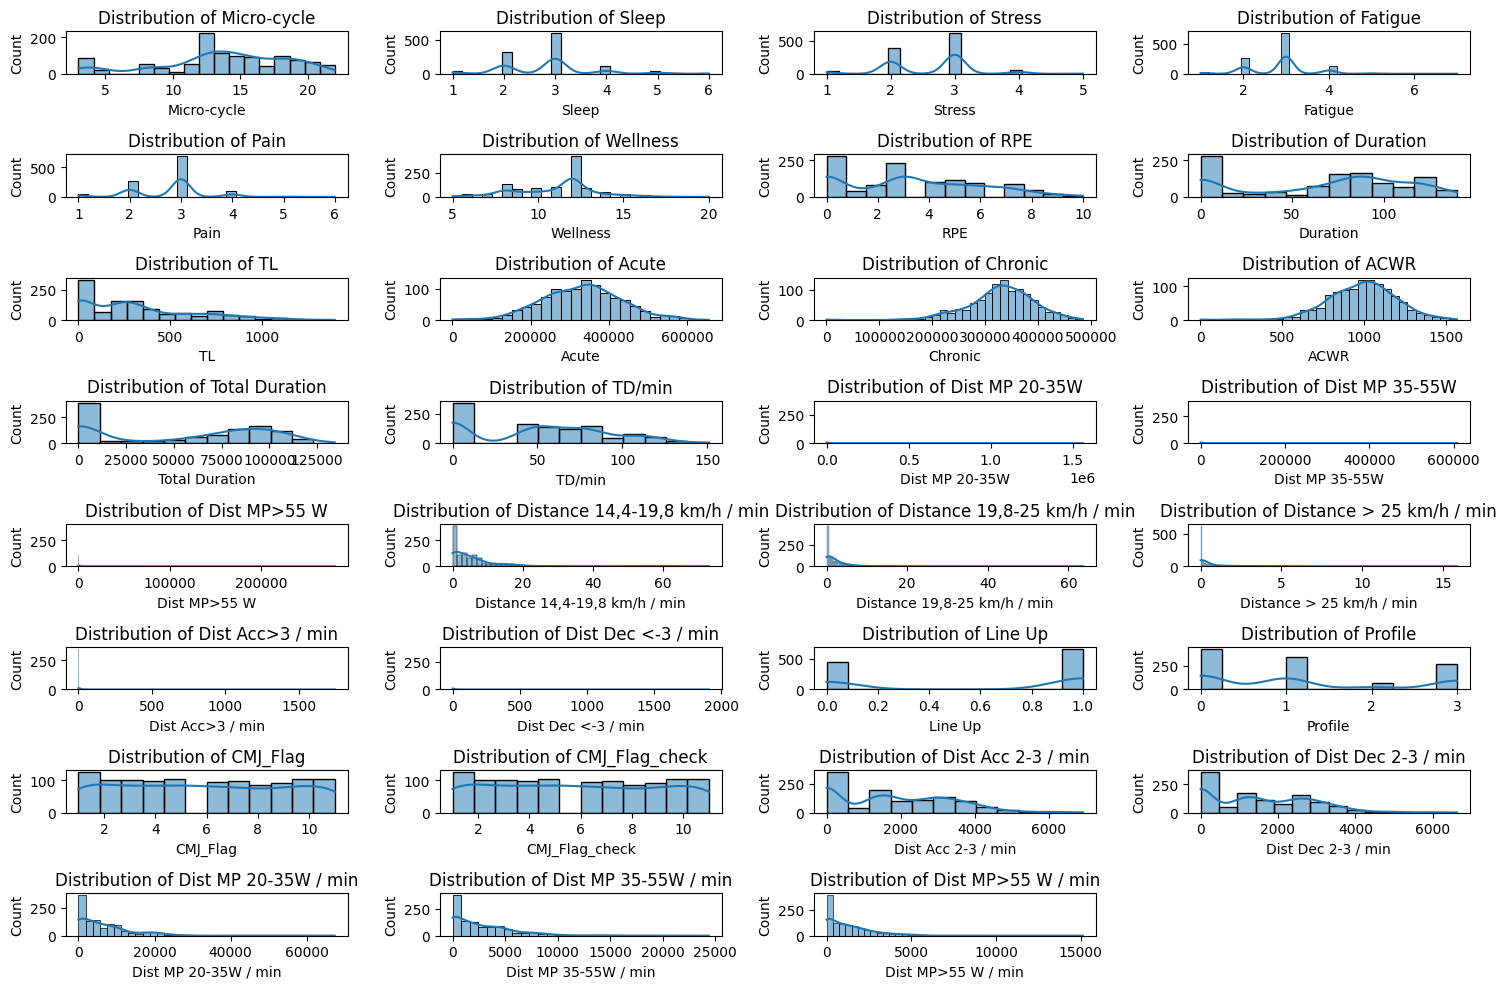

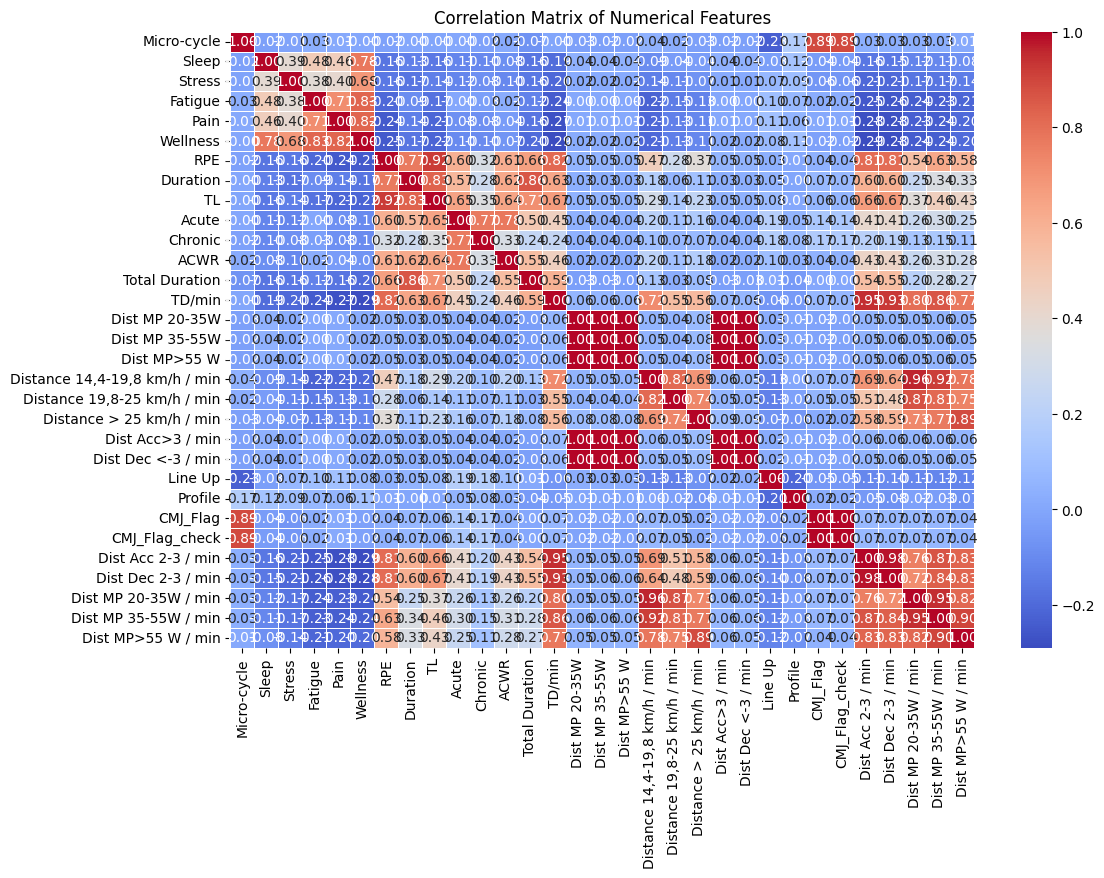

KeyboardInterrupt: 

Error in callback <function _draw_all_if_interactive at 0x7d5a24e3e4d0> (for post_execute):


KeyboardInterrupt: 

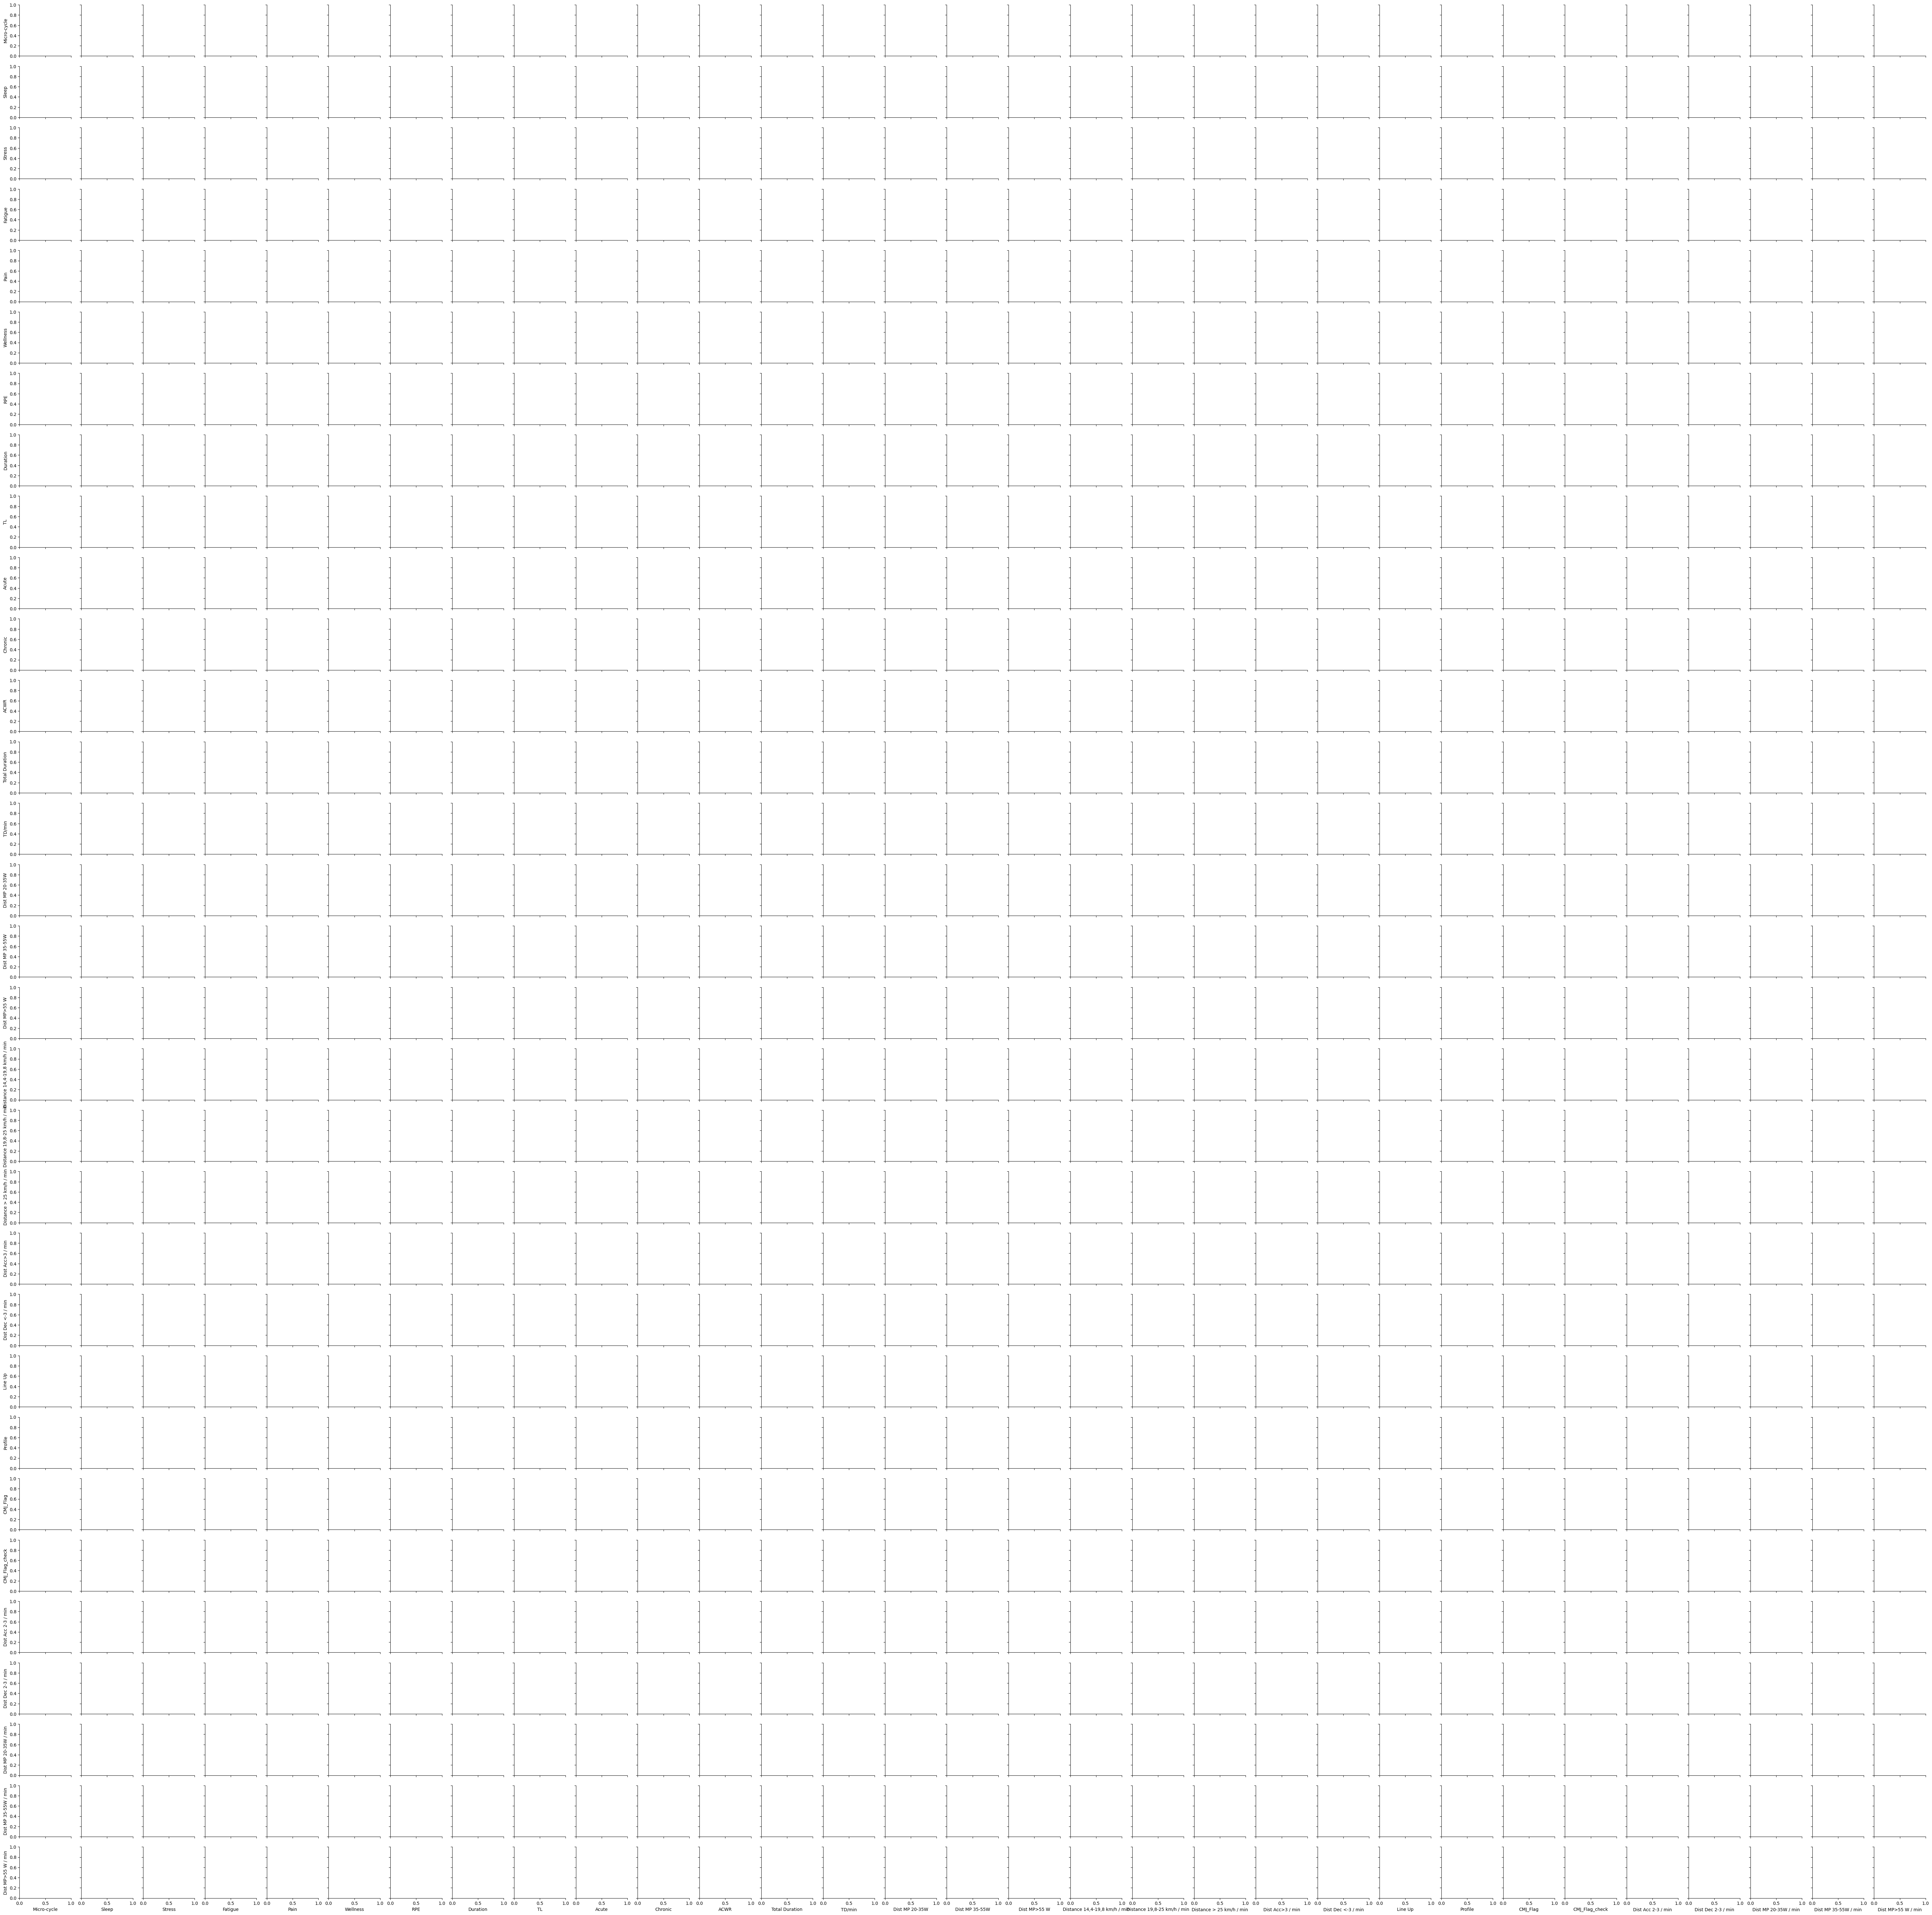

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Load the data
data = pd.read_excel('/content/your_file_converted.xlsx')

# Step 1: Data Overview
print("Shape of the dataset:", data.shape)
print("Columns in the dataset:", data.columns)
print("First few rows of the dataset:")
print(data.head())

# Step 2: Check for missing values
missing_values = data.isnull().sum()
print("\nMissing values per column:")
print(missing_values[missing_values > 0])

# Step 3: Basic statistics of numeric features
print("\nDescriptive statistics of numeric columns:")
print(data.describe())

# Step 4: Check for categorical variables
categorical_columns = data.select_dtypes(include=['object']).columns
print("\nCategorical columns in the dataset:")
print(categorical_columns)

# Step 5: Value counts of categorical features
for col in categorical_columns:
    print(f"\nValue counts for {col}:")
    print(data[col].value_counts())

# Step 6: Distribution of numerical variables
numeric_columns = data.select_dtypes(include=['float64', 'int64']).columns
# Plot histograms for all numeric features
plt.figure(figsize=(15, 10))
# Calculate the number of rows needed for subplots
num_rows = int(np.ceil(len(numeric_columns) / 4))  # Assuming 4 columns

for i, col in enumerate(numeric_columns, 1):
    plt.subplot(num_rows, 4, i)  # Adjust layout dynamically
    sns.histplot(data[col], kde=True)
    plt.title(f'Distribution of {col}')
    plt.tight_layout()
plt.show()

# Step 7: Correlation matrix (for numerical features)
correlation_matrix = data[numeric_columns].corr()

# Plot the correlation matrix
plt.figure(figsize=(12, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt='.2f', linewidths=0.5)
plt.title('Correlation Matrix of Numerical Features')
plt.show()

# Step 8: Pairplot for some of the numeric features (optional)
sns.pairplot(data[numeric_columns].sample(100))  # Sample 100 rows for clarity
plt.show()

# Step 9: Boxplots for checking outliers in numeric columns
plt.figure(figsize=(15, 10))
num_rows = int(np.ceil(len(numeric_columns) / 4))
for i, col in enumerate(numeric_columns, 1):
    plt.subplot(num_rows, 4, i)  # Adjust layout if you have more than 12 features
    sns.boxplot(x=data[col])
    plt.title(f'Boxplot of {col}')
    plt.tight_layout()
plt.show()

# Step 10: Checking relationships between features and target (training load - 'tl')
# Pairplot to see relationship of features with target variable (if relevant)
sns.pairplot(data, vars=numeric_columns.tolist() + ['tl'], hue='tl', plot_kws={'alpha': 0.5})
plt.show()

# Step 11: Feature importance based on correlation with the target variable
correlation_with_target = data[numeric_columns].corrwith(data['tl']).sort_values(ascending=False)
print("\nCorrelation with Training Load (tl):")
print(correlation_with_target)

# Optional: Check for skewness in the features
skewness = data[numeric_columns].skew()
print("\nSkewness of numeric features:")
print(skewness)

# Optional: Check for kurtosis in the features
kurtosis = data[numeric_columns].kurtosis()
print("\nKurtosis of numeric features:")
print(kurtosis)


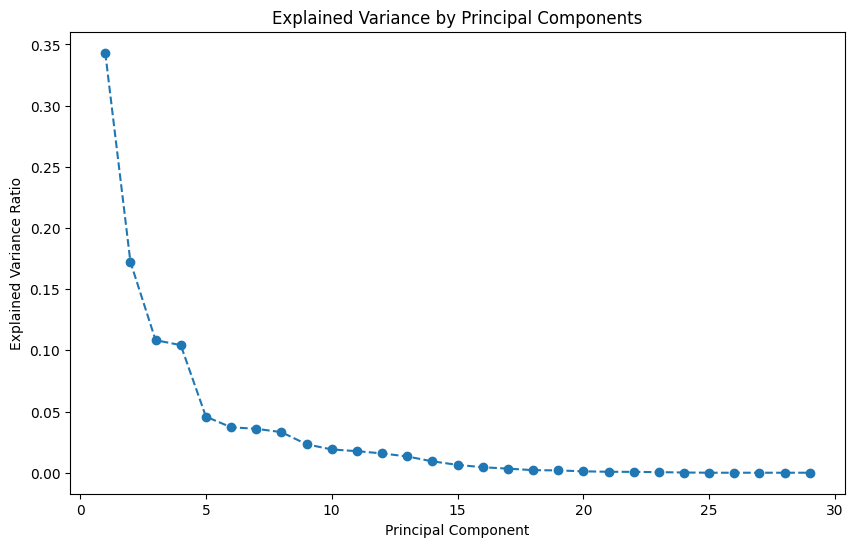

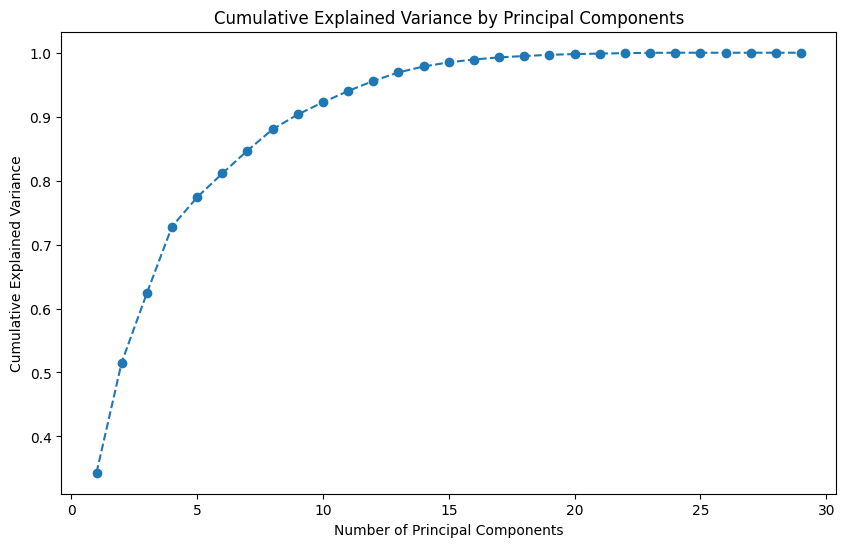

Number of components chosen: 12
Mean Squared Error (MSE): 0.004577336022246737
R-squared (R2): 0.9003024937292111


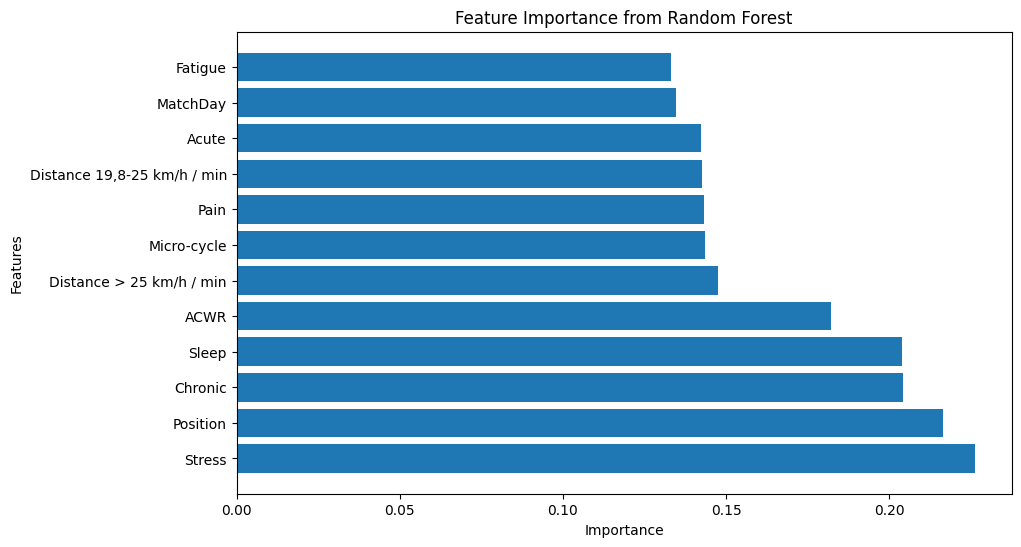

Original predictions: [[  0.  ]
 [  0.  ]
 [782.75]
 [234.95]
 [  0.  ]]
Actual values: [[  0.]
 [  0.]
 [840.]
 [160.]
 [  0.]]


In [ ]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.preprocessing import MinMaxScaler
import matplotlib.pyplot as plt

# Step 1: Preprocess the dataset (same as previous)
data = pd.read_excel('/content/your_file_converted copy.xlsx')

# Drop irrelevant columns
irrelevant_columns = ['Name', 'Date', 'Attendance', 'Profile', 'week', 'CMJ_Flag', 'CMJ_Flag_check']
data = data.drop(columns=irrelevant_columns, errors='ignore')

# Separate target variable (training load) and features
X = data.drop(columns=['TL'], errors='ignore')  # Features
y = data['TL']  # Target variable (training load)

# Encode categorical variables
categorical_columns = X.select_dtypes(include=['object']).columns
label_encoders = {col: LabelEncoder() for col in categorical_columns}
for col in categorical_columns:
    X[col] = label_encoders[col].fit_transform(X[col])

# Standardize the numerical features
scaler = StandardScaler()
X_standardized = scaler.fit_transform(X.select_dtypes(include=['float64', 'int64']))

# Step 2: Scale the target variable (training load) to the range [0, 1]
scaler_y = MinMaxScaler(feature_range=(0, 1))
y_scaled = scaler_y.fit_transform(y.values.reshape(-1, 1)).flatten()

# Step 3: Perform PCA for dimensionality reduction
pca = PCA()
X_pca = pca.fit_transform(X_standardized)

# Explained variance ratio
explained_variance = pca.explained_variance_ratio_

# Plot explained variance ratio
plt.figure(figsize=(10, 6))
plt.plot(range(1, len(explained_variance) + 1), explained_variance, marker='o', linestyle='--')
plt.title('Explained Variance by Principal Components')
plt.xlabel('Principal Component')
plt.ylabel('Explained Variance Ratio')
plt.show()

# Step 4: Choose number of components based on explained variance
cumulative_variance = np.cumsum(explained_variance)
plt.figure(figsize=(10, 6))
plt.plot(range(1, len(cumulative_variance) + 1), cumulative_variance, marker='o', linestyle='--')
plt.title('Cumulative Explained Variance by Principal Components')
plt.xlabel('Number of Principal Components')
plt.ylabel('Cumulative Explained Variance')
plt.show()

# Choose the number of components that explain 90-95% of the variance
n_components = np.argmax(cumulative_variance >= 0.95) + 1
print(f"Number of components chosen: {n_components}")

# Apply PCA with the chosen number of components
pca = PCA(n_components=n_components)
X_pca_reduced = pca.fit_transform(X_standardized)

# Step 5: Split data into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X_pca_reduced, y_scaled, test_size=0.2, random_state=42)

# Step 6: Train the Random Forest Regressor model
rf_model = RandomForestRegressor(n_estimators=100, random_state=42)
rf_model.fit(X_train, y_train)

# Step 7: Make predictions and evaluate the model
y_pred = rf_model.predict(X_test)

# Evaluate performance
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f"Mean Squared Error (MSE): {mse}")
print(f"R-squared (R2): {r2}")

# Feature importance from Random Forest
# Get feature names from original data before PCA
features = X.columns
importances = rf_model.feature_importances_

# Create a DataFrame to map PCA components to original features
components_df = pd.DataFrame(pca.components_, columns=features)

# Calculate feature importances based on PCA components
feature_importances = np.abs(components_df).mean(axis=0)

# Sort feature importances in descending order
sorted_features = feature_importances.sort_values(ascending=False).index

# Select the top N features based on their importance
top_n_features = sorted_features[:n_components] # Here n_components is the number of components chosen in PCA

# Plot feature importances using the selected top features
plt.figure(figsize=(10, 6))
plt.barh(top_n_features, feature_importances[top_n_features])
plt.title('Feature Importance from Random Forest')
plt.xlabel('Importance')
plt.ylabel('Features')
plt.show()

# Step 8: Inverse transform the predictions to get them back in the original scale
y_pred_original = scaler_y.inverse_transform(y_pred.reshape(-1, 1))

# If you want to print a few of the predictions alongside the actual values
print(f"Original predictions: {y_pred_original[:5]}")
print(f"Actual values: {scaler_y.inverse_transform(y_test.reshape(-1, 1))[:5]}")
